In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [26]:
#loading data
df = pd.read_csv('C:/Users/ramya/OneDrive/Desktop/archive/smoking.csv')
# to see first 5 rows of your dataset
print(df.head())

   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y           

In [27]:
# handling missing values
df.shape
df.info

<bound method DataFrame.info of           ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyesight(rig

In [28]:
# for checking null values
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [31]:
# handling categorical values
new_df = df.assign(
    gender=df['gender'].map({'F': 0, 'M': 1}).astype(int),
    tartar=df['tartar'].map({'N': 0, 'Y': 1}).astype(int),
    oral=df['oral'].map({'Y': 0}).astype(int)
)

In [32]:
print(new_df.head())

   ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0       0   40         155          60       81.3             1.2   
1   1       0   40         160          60       81.0             0.8   
2   2       1   55         170          60       80.0             0.8   
3   3       1   40         165          70       88.0             1.5   
4   4       0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     0     

In [33]:
# descriptive statistics of numerical variables
new_df.describe()

ID        gender           age    height(cm)    weight(kg)  \
count  55692.000000  55692.000000  55692.000000  55692.000000  55692.000000   
mean   27845.500000      0.635657     44.182917    164.649321     65.864936   
std    16077.039933      0.481250     12.071418      9.194597     12.820306   
min        0.000000      0.000000     20.000000    130.000000     30.000000   
25%    13922.750000      0.000000     40.000000    160.000000     55.000000   
50%    27845.500000      1.000000     40.000000    165.000000     65.000000   
75%    41768.250000      1.000000     55.000000    170.000000     75.000000   
max    55691.000000      1.000000     85.000000    190.000000    135.000000   

          waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  55692.000000    55692.000000     55692.000000   55692.000000   
mean      82.046418        1.012623         1.007443       1.025587   
std        9.274223        0.486873         0.485964       0.157902   
min       51.000000        0.100000         0.100000       1.000000   
25%       76.000000        0.800000         0.800000       1.000000   
50%       82.000000        1.000000         1.000000       1.000000   
75%       88.000000        1.200000         1.200000       1.000000   
max      129.000000        9.900000         9.900000       2.000000   

       hearing(right)  ...    hemoglobin  Urine protein  serum creatinine  \
count    55692.000000  ...  55692.000000   55692.000000      55692.000000   
mean         1.026144  ...     14.622592       1.087212          0.885738   
std          0.159564  ...      1.564498       0.404882          0.221524   
min          1.000000  ...      4.900000       1.000000          0.100000   
25%          1.000000  ...     13.600000       1.000000          0.800000   
50%          1.000000  ...     14.800000       1.000000          0.900000   
75%          1.000000  ...     15.800000       1.000000          1.000000   
max          2.000000  ...     21.100000       6.000000         11.600000   

                AST           ALT           Gtp     oral  dental caries  \
count  55692.000000  55692.000000  55692.000000  55692.0   55692.000000   
mean      26.182935     27.036037     39.952201      0.0       0.213334   
std       19.355460     30.947853     50.290539      0.0       0.409665   
min        6.000000      1.000000      1.000000      0.0       0.000000   
25%       19.000000     15.000000     17.000000      0.0       0.000000   
50%       23.000000     21.000000     25.000000      0.0       0.000000   
75%       28.000000     31.000000     43.000000      0.0       0.000000   
max     1311.000000   2914.000000    999.000000      0.0       1.000000   

             tartar       smoking  
count  55692.000000  55692.000000  
mean       0.555556      0.367288  
std        0.496908      0.482070  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 27 columns]

<Axes: ylabel='count'>

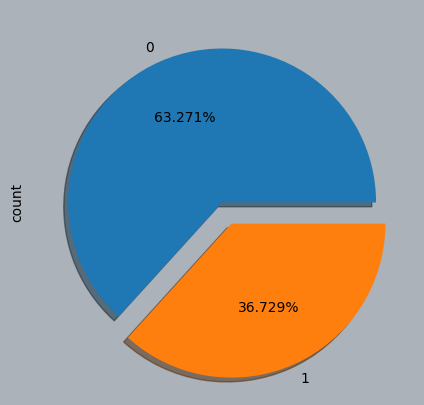

In [34]:
# univariate analysis
plt.figure(figsize=(5, 5), clear=True, facecolor="#ABB2B9")
new_df["smoking"].value_counts().plot.pie (explode=[0, 0.15], autopct='%1.3f%%', shadow=True)

In [35]:
sns.countplot(new_df['smoking'])
plt.show()

KeyboardInterrupt: 

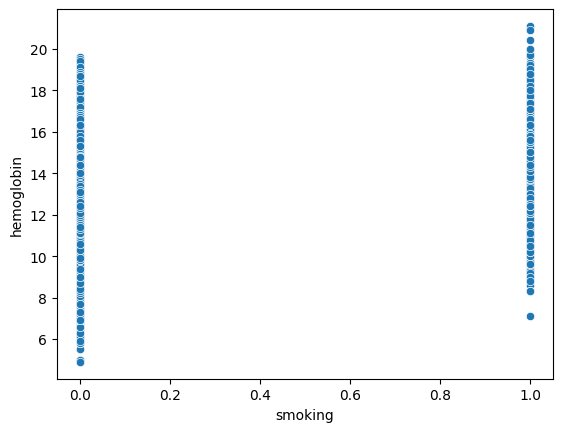

In [ ]:
#Bivariate Analysis
sns.scatterplot(x='smoking',y='hemoglobin',data=new_df)
plt.show()

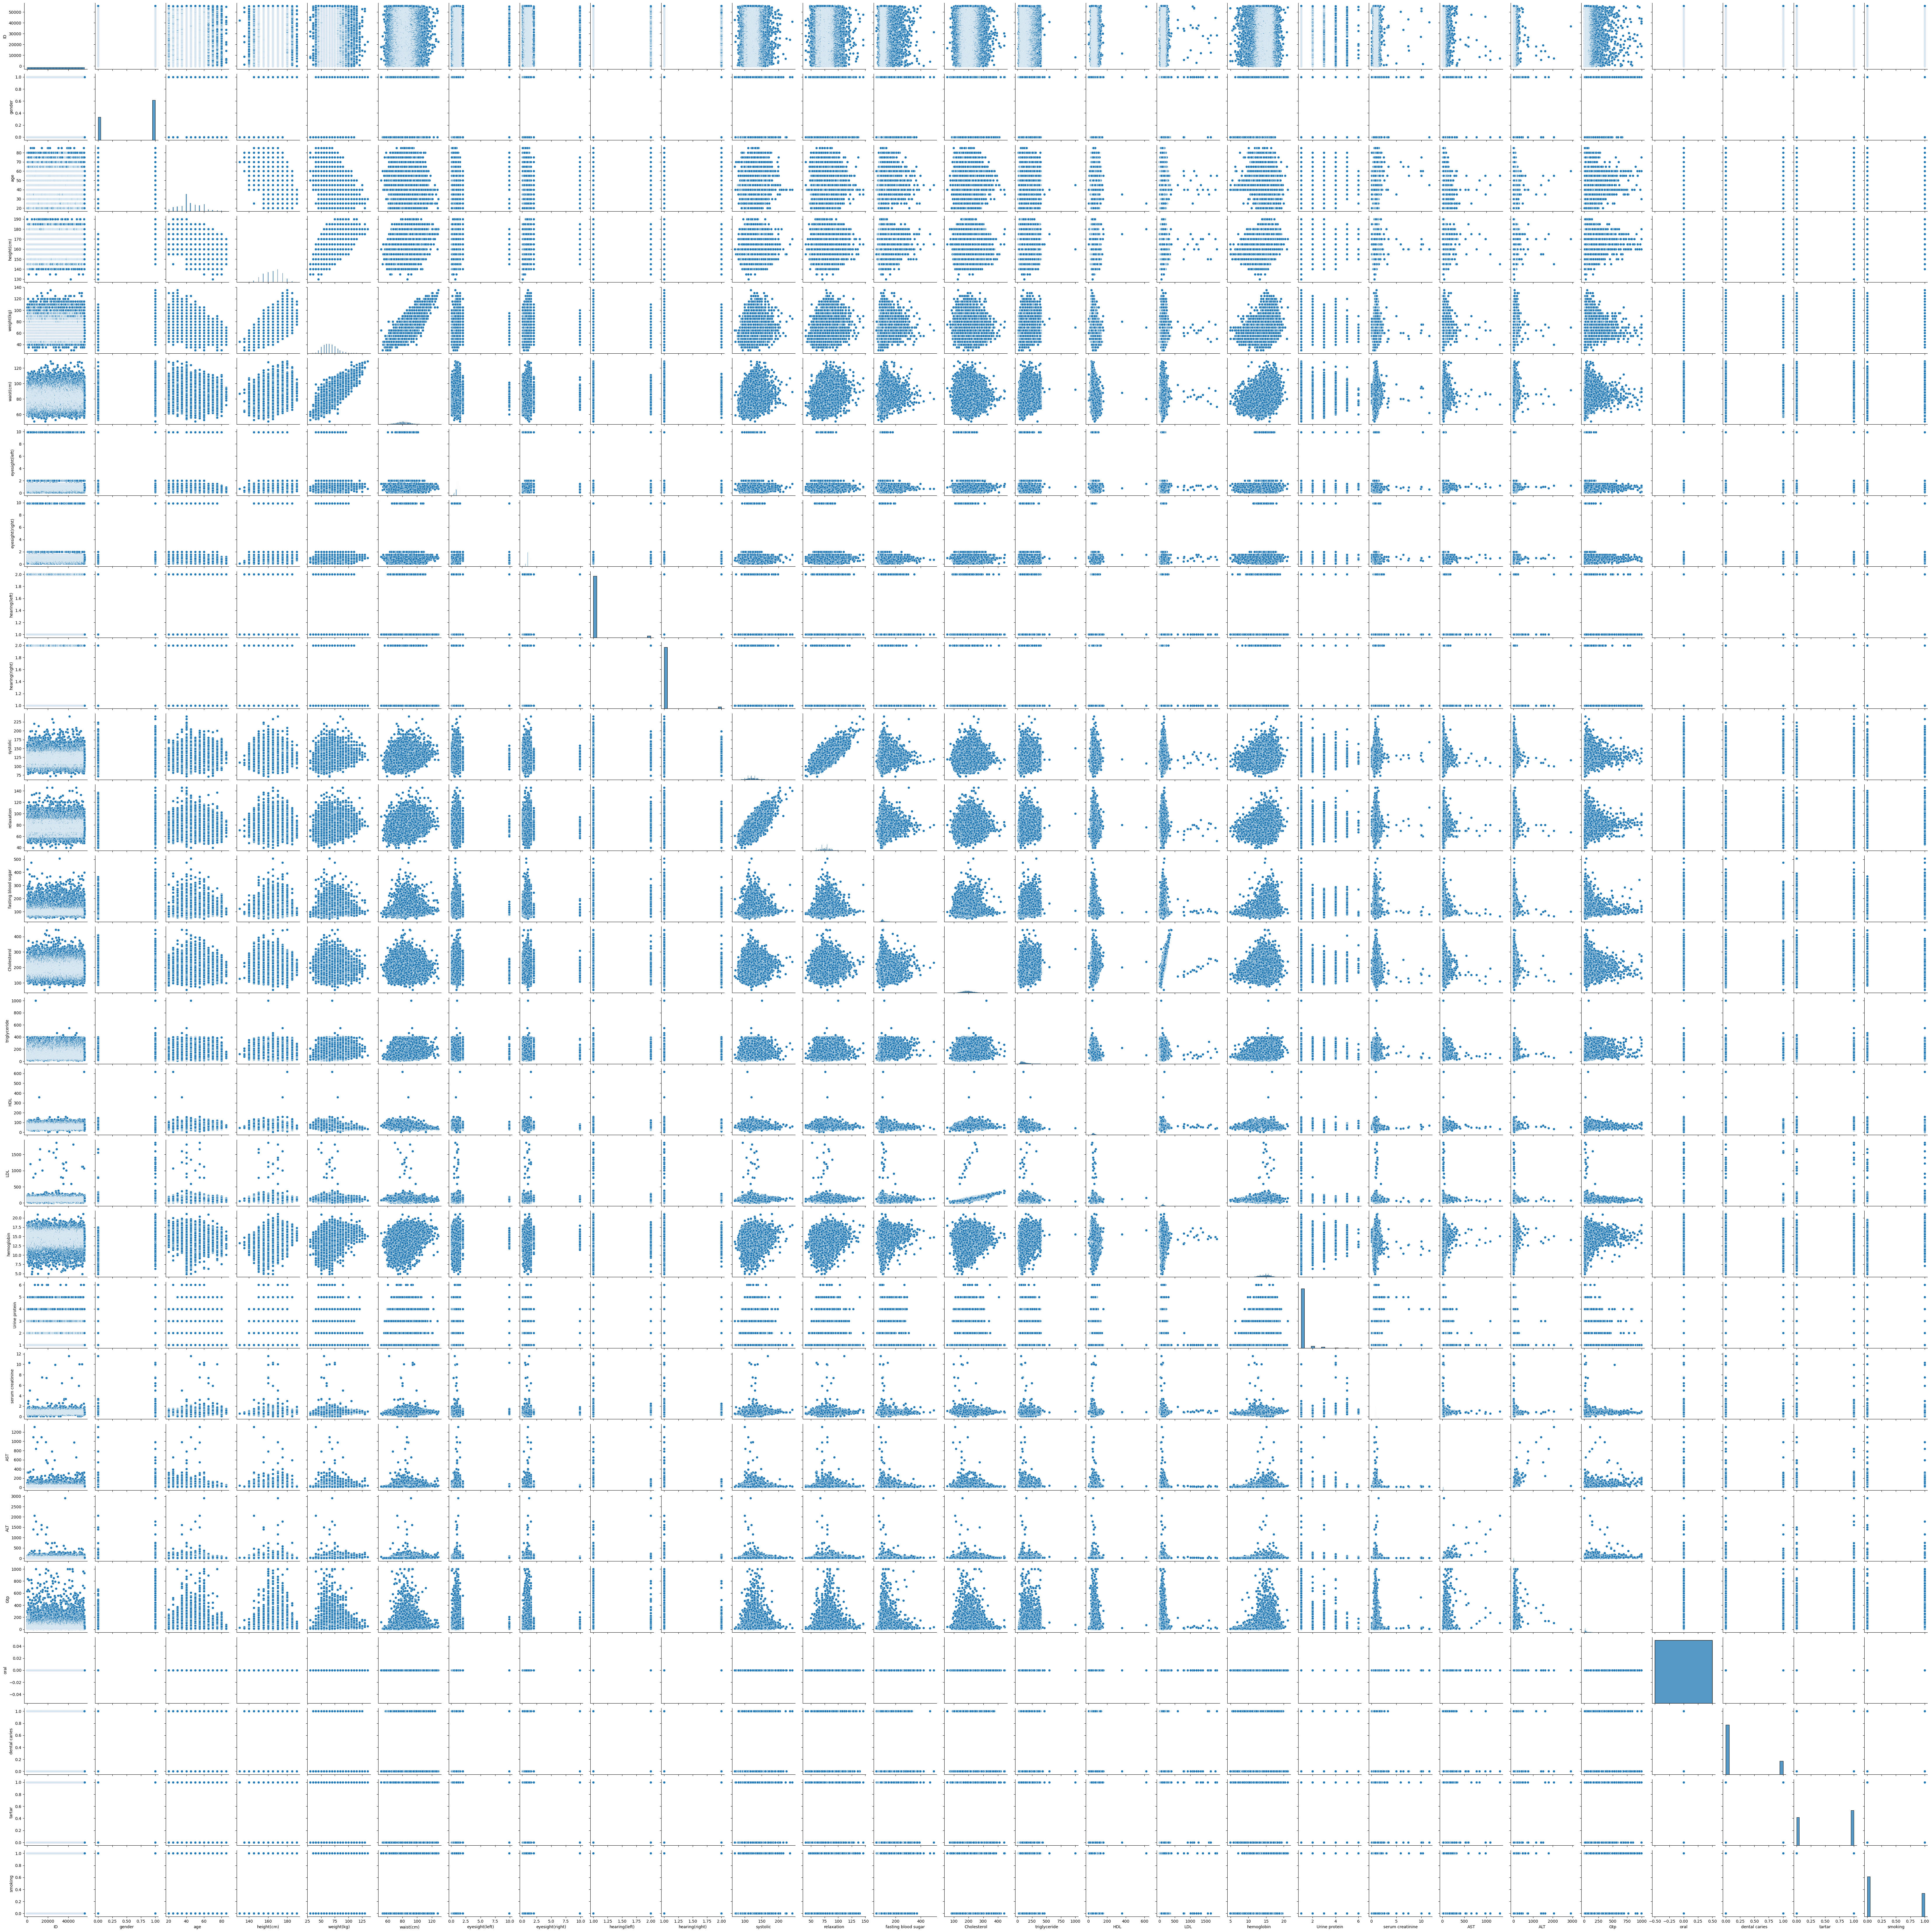

In [ ]:
#Multivariate Analysis
sns.pairplot(new_df)
plt.show()

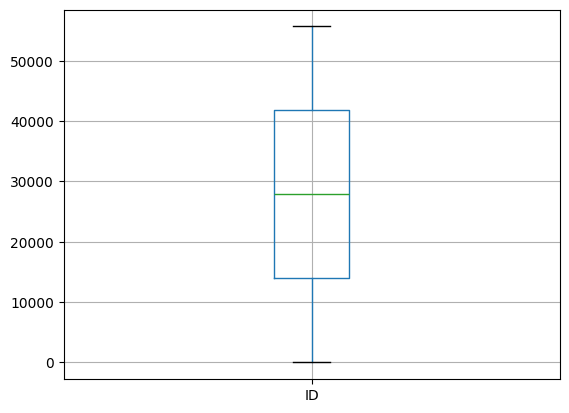

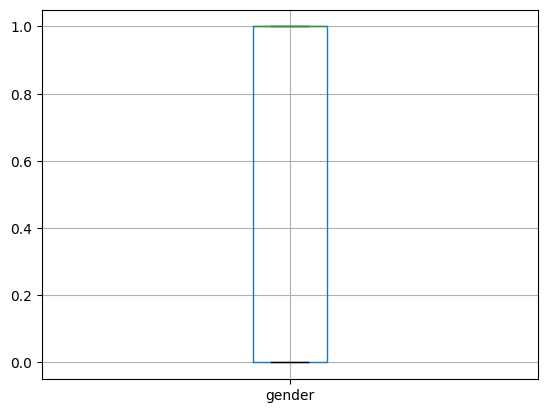

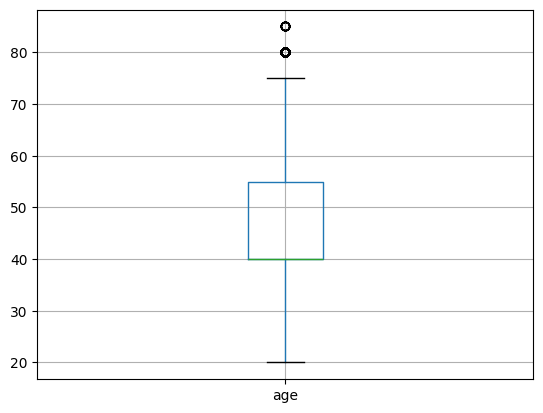

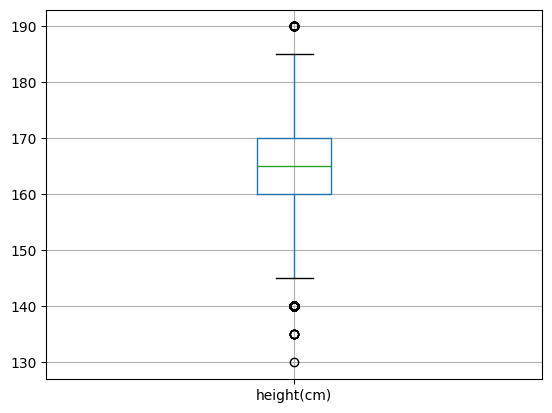

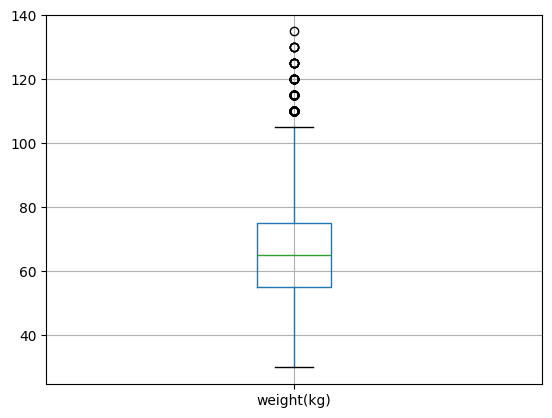

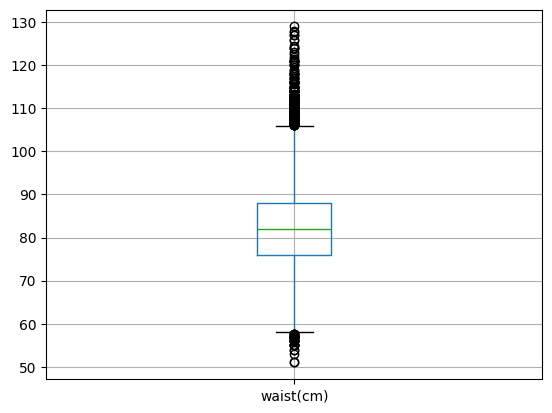

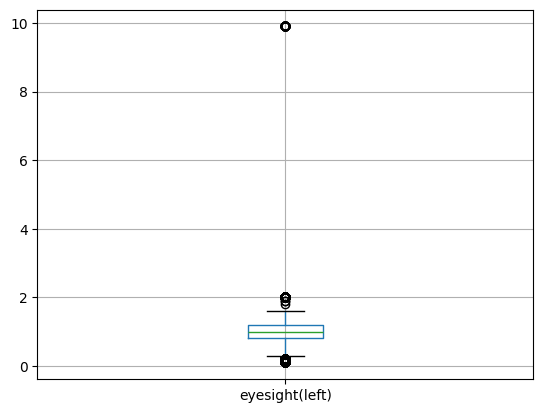

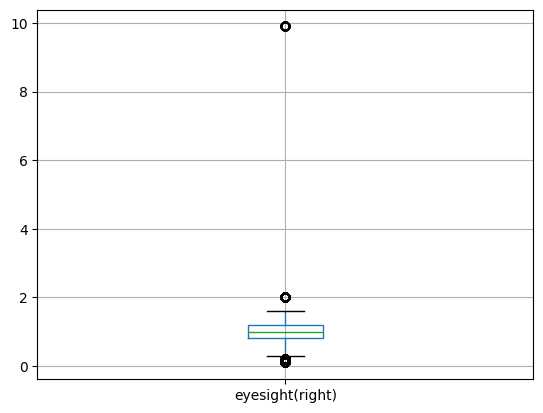

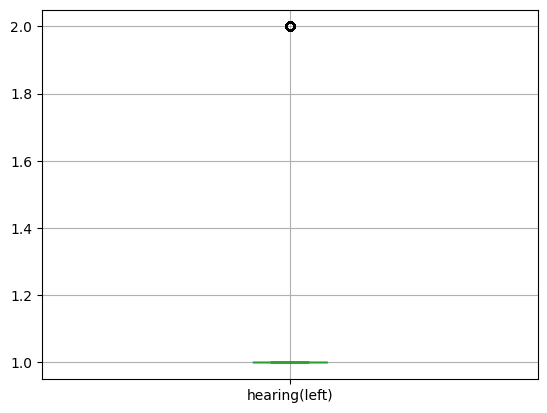

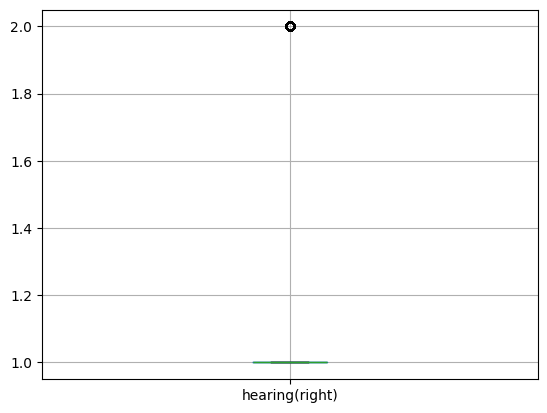

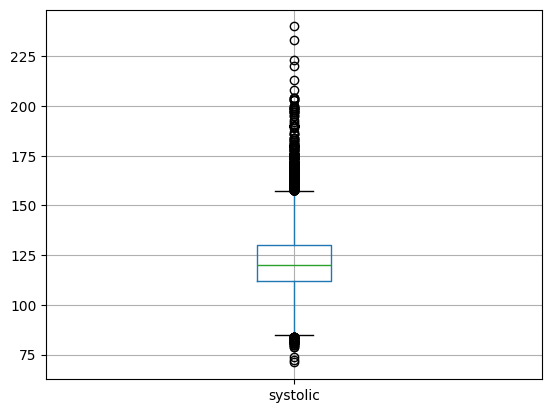

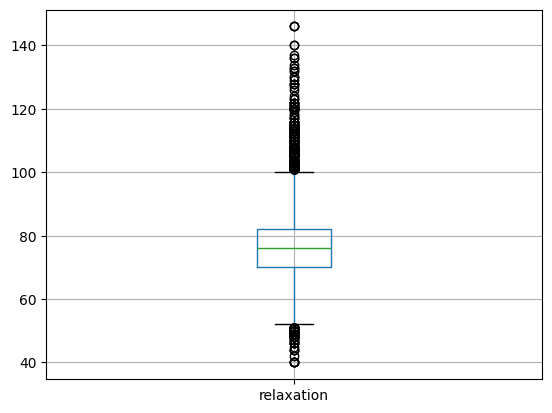

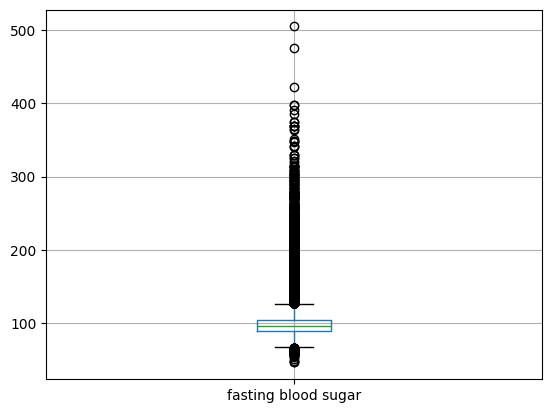

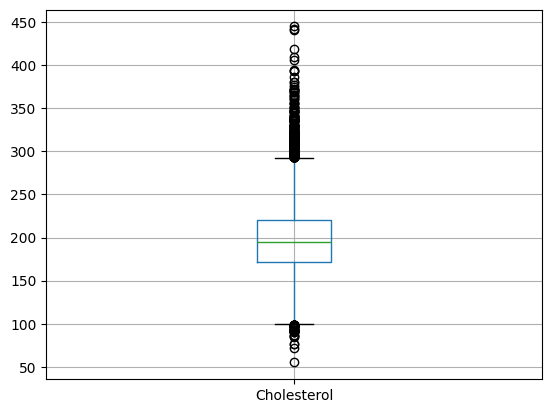

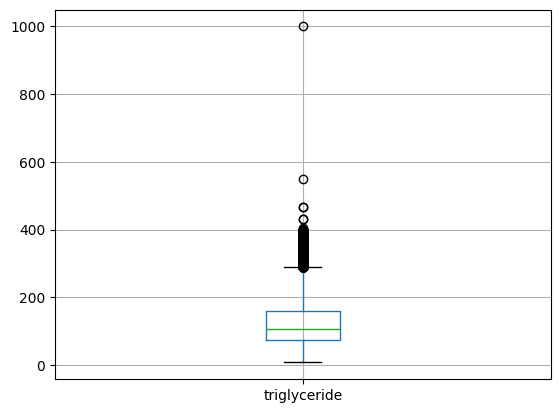

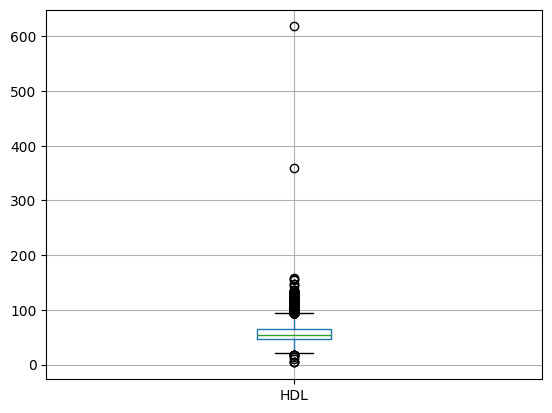

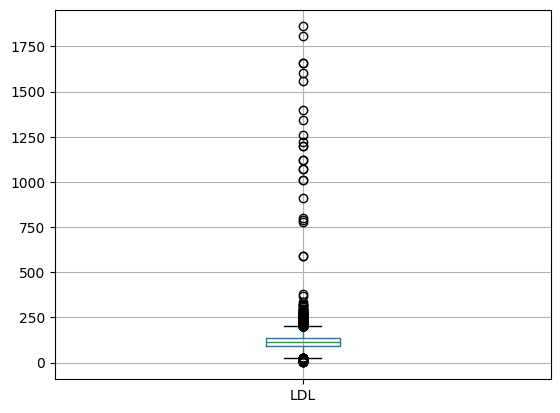

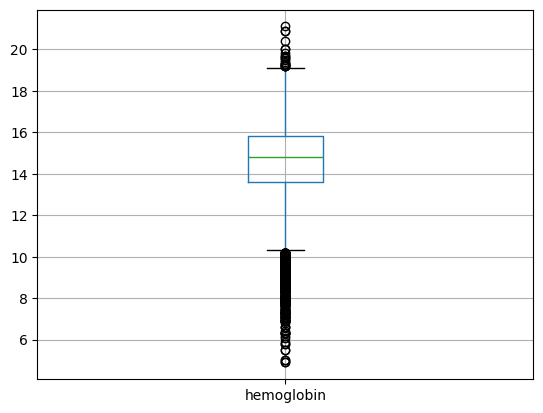

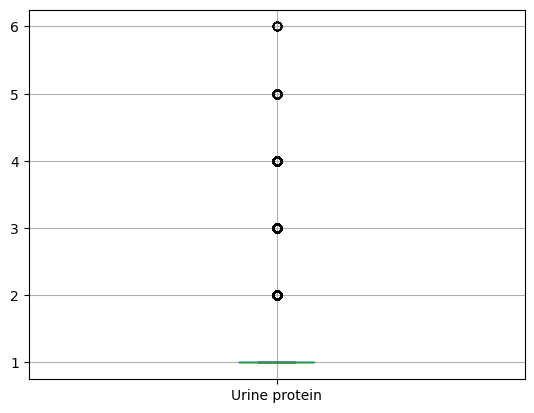

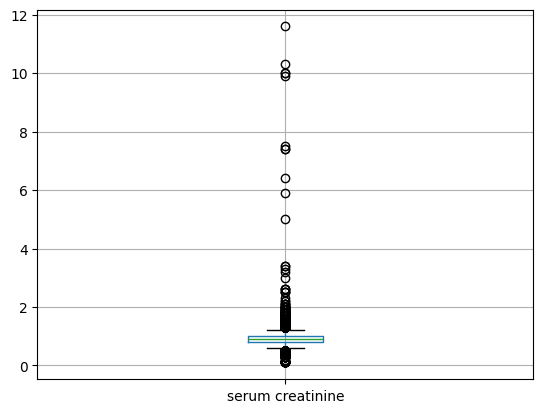

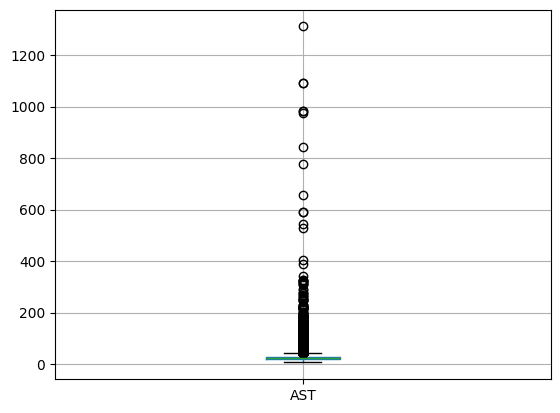

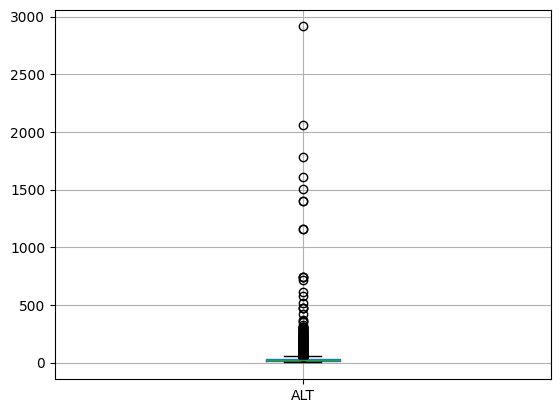

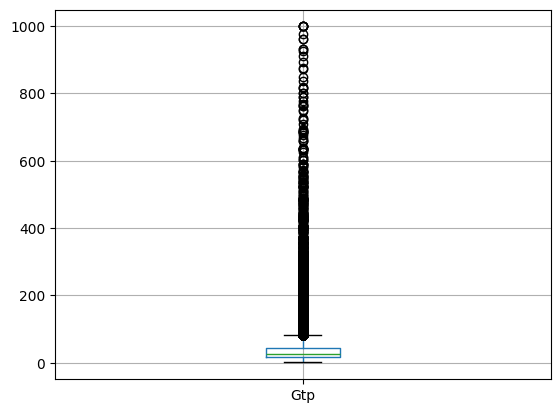

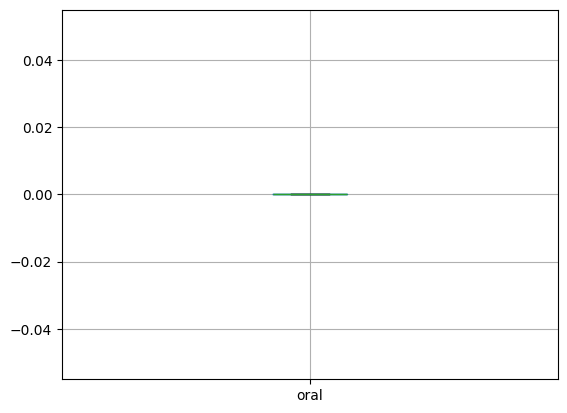

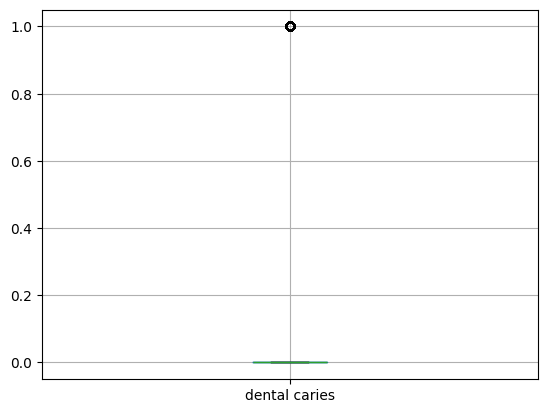

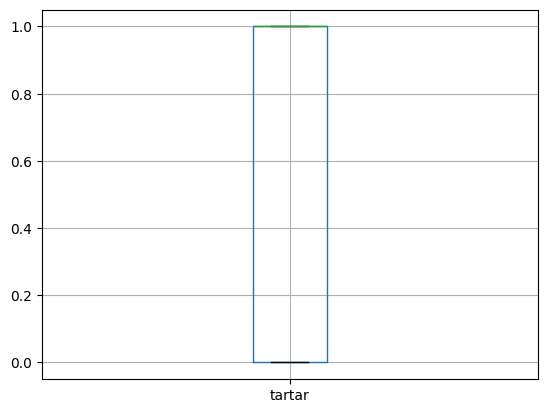

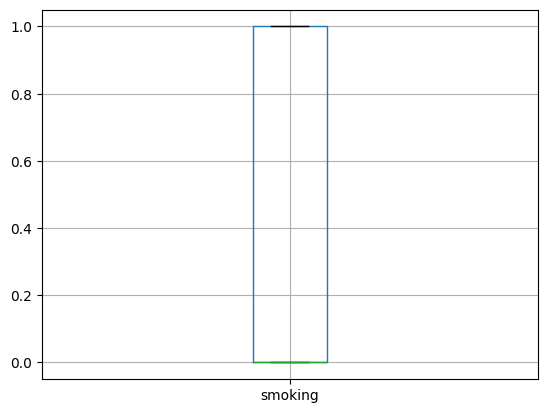

In [ ]:
# Outliers Handling
for i in new_df.columns:
    new_df[[i]].boxplot()
    plt.show()

In [ ]:
from collections import Counter
def outlier_detection (new_df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1= np.nanpercentile(new_df[col], 25) 
        Q3=np.nanpercentile(new_df[col], 75)
        IQR = Q3 - Q1
        outlier_point=1.5*IQR
        rows.extend(new_df[(new_df[col] < Q1 - outlier_point)|(new_df[col]> Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train 
will_drop_train= outlier_detection (new_df, 5, new_df.select_dtypes (["float", "int"]).columns)
will_drop_train[0:5]


[44, 3368, 3592, 4171, 4738]

In [ ]:
new_df.drop(will_drop_train, inplace =True, axis= 0)

In [ ]:
# Separating Data For Traning And Testing
from sklearn.model_selection import train_test_split
x = new_df.drop(['smoking'], axis=1) 
y = new_df['smoking']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)

In [ ]:
# Scaling the values
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
scaler = MinMaxScaler() 
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [ ]:
# Traning model with logistic regression
from sklearn.linear_model import LogisticRegression
logi= LogisticRegression()
logi
logi.fit(x_train, y_train)

C:\Users\ramya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred=logi.predict(x_train)
y_test_pred=logi.predict(x_test)

In [ ]:
#Confusion Matrix For Training Data with Training Data
confusion_matrix(y_train,y_train_pred)

array([[19119,  5429],
       [ 4372,  9633]], dtype=int64)

In [ ]:
#Accuracy For Training Data with Logistic Regression
accuracy_score (y_train,y_train_pred)*100

74.57785386351257

In [ ]:
#Classifiaction Report For Training Data Logistic Regression
print(classification_report (y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     24548
           1       0.64      0.69      0.66     14005

    accuracy                           0.75     38553
   macro avg       0.73      0.73      0.73     38553
weighted avg       0.75      0.75      0.75     38553



In [ ]:
# traning model with rondamforest algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy', random_state=0)
print(rf)

RandomForestClassifier(criterion='entropy', random_state=0)


In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_train_pred= rf.predict(x_train)
y_test_pred= rf.predict(x_test)

In [ ]:
#confusion Matrix For Training Data with Random Forest classifier
confusion_matrix(y_train, y_train_pred)

array([[24548,     0],
       [    1, 14004]], dtype=int64)

In [ ]:
#Accuracy For Training Data with Random Forest Classifier
accuracy_score(y_train,y_train_pred)*100

99.99740616813219

In [ ]:
#classification Report For Training Data with Random Forest Classifier
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24548
           1       1.00      1.00      1.00     14005

    accuracy                           1.00     38553
   macro avg       1.00      1.00      1.00     38553
weighted avg       1.00      1.00      1.00     38553



In [ ]:
#Confusion Matrix For Testing Data with Random Forest Classifier
confusion_matrix(y_test, y_test_pred)

array([[8915, 1476],
       [1388, 4744]], dtype=int64)

In [ ]:
# Traning with decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Deci = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
print(Deci)

DecisionTreeClassifier(criterion='entropy', random_state=0)


In [ ]:
Deci.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_train_pred= Deci.predict(x_train)
y_test_pred= Deci.predict(x_test)

In [ ]:
#confusion Matrix For Training Data with Decision Tree classifier
confusion_matrix(y_train, y_train_pred)

array([[24548,     0],
       [    0, 14005]], dtype=int64)

In [ ]:
#Accuracy For Training Data with Decision Tree Classifier
accuracy_score(y_train,y_train_pred)*100

100.0

In [ ]:
#classification Report For Training Data with Decision Tree Classifier
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24548
           1       1.00      1.00      1.00     14005

    accuracy                           1.00     38553
   macro avg       1.00      1.00      1.00     38553
weighted avg       1.00      1.00      1.00     38553



In [ ]:
#Confusion Matrix For Testing Data with Decision Tree Classtfter
confusion_matrix(y_test, y_test_pred)

array([[8467, 1924],
       [1942, 4190]], dtype=int64)

In [ ]:
#Accuracy For Training Data with Decision Tree Classifier
accuracy_score(y_test,y_test_pred)*100

76.60231192882648

In [ ]:
#classification Report For Training Data with Decision Tree Classifier
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     10391
           1       0.69      0.68      0.68      6132

    accuracy                           0.77     16523
   macro avg       0.75      0.75      0.75     16523
weighted avg       0.77      0.77      0.77     16523



In [ ]:
# Traning with XGB classifier
import xgboost as xgb

In [ ]:
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

C:\Users\ramya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred=xg.predict(x_train)
y_test_pred=xg.predict(x_test)

In [ ]:
#confusion Matrix For Training Data with XGB classifier
confusion_matrix(y_train, y_train_pred)

array([[21881,  2667],
       [ 2197, 11808]], dtype=int64)

In [ ]:
#Accuracy For Training Data with XGB Classifier
accuracy_score(y_train,y_train_pred)*100

87.38360179493165

In [ ]:
#classification Report For Training Data with XGB Classifier
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     24548
           1       0.82      0.84      0.83     14005

    accuracy                           0.87     38553
   macro avg       0.86      0.87      0.86     38553
weighted avg       0.87      0.87      0.87     38553



In [ ]:
#Confusion Matrix For Testing Data with XGB Classtfter
confusion_matrix(y_test, y_test_pred)

array([[8518, 1873],
       [1770, 4362]], dtype=int64)

In [ ]:
#Accuracy For Training Data with XGB Classifier
accuracy_score(y_test,y_test_pred)*100

77.95194577255945

In [ ]:
#classification Report For Training Data with XGB Classifier
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     10391
           1       0.70      0.71      0.71      6132

    accuracy                           0.78     16523
   macro avg       0.76      0.77      0.76     16523
weighted avg       0.78      0.78      0.78     16523



In [ ]:
# Testing models
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize variables to keep track of the best model and accuracy
best_model = None
best_accuracy = 0.0

# Loop through the models and evaluate their accuracy
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    print(f'{model_name} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f'The best model is {best_model} with an accuracy of {best_accuracy}')

C:\Users\ramya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.7431459178115354
Random Forest - Accuracy: 0.8240029050414573
Decision Tree - Accuracy: 0.7622102523754766


C:\Users\ramya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBoost - Accuracy: 0.7795194577255946
The best model is Random Forest with an accuracy of 0.8240029050414573


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load a sample dataset for demonstration
# x = new_df.drop(['smoking',], axis=1)
new_columns=['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'waist(cm)', 'smoking']
new_df1=new_df[new_columns]
x=new_df1.drop(['smoking'], axis=1)
y = new_df1['smoking']

# Select a subset of your data (e.g., the first 1000 rows)
x_subset = x[:500]
y_subset = y[:500]

# Split the subset dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  # Experiment with different values
    'max_depth': [None, 10, 20, 30],  # Experiment with different values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)  # Fit the randomized search object

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)  # Fit the best classifier with the training data

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Accuracy on Test Set: 0.78


In [48]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [54]:
pickle.dump(best_rf_classifier,open('smoking.pkl','wb'))

In [60]:
prediction=best_rf_classifier.predict((np.array([[3,1,89,65,54,3,2,1,4,4]])))
print("The value of smoke is : ",prediction)

The value of smoke is :  [0]


C:\Users\ramya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
